# CS166 LBA Notebook

### Traffic Visualization: Interpreting Congestion on the Road Network

The figure below shows the road network around **Adalbertstraße 58, Berlin** with simulated car traffic over several time steps.

Each **edge (road segment)** is styled according to how many cars are currently using it:

- **Color (red intensity)**  
  - Light gray edges have **no cars** on them in the final simulation step.  
  - Edges become **increasingly red** as more cars are present.  
  - The color scale is normalized from `0` up to the **maximum number of cars on any road** in this simulation.  
  - The colorbar on the side shows how many cars correspond to each red intensity.

- **Line width**  
  - Thinner lines correspond to roads with **few or no cars**.  
  - Thicker lines indicate roads with **higher traffic volume** (more cars).

The goal of this visualization is to make **congested roads visually stand out**:
roads that are both **dark red and thick** are those with the **highest simulated congestion**.
By visually scanning for these segments, we can quickly identify which parts of the network are most heavily used in the current simulation scenario.

## Task 1 - Debugging

In [1]:
!pip install osmnx


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def load_berlin_road_network():
    # Get the road network for Berlin
    G = ox.graph_from_address('Adalbertstraße 58, Berlin, Germany', dist=1000, network_type='drive')
    
    return G

def plot_network(G):
    fig, ax = ox.plot_graph(G, figsize=(10,10))
    
    return fig, ax

In [4]:
berlin_network = load_berlin_road_network()

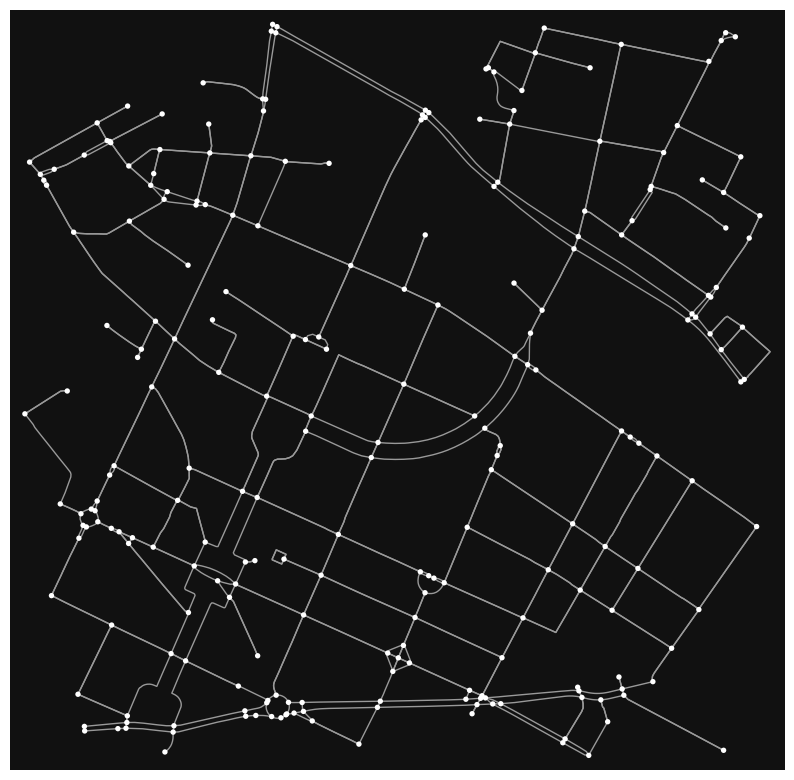

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [5]:
plot_network(berlin_network)

In [40]:
import osmnx as ox
import networkx as nx
import random

class Car:
    def __init__(self, start, destination):
        self.current_location = start
        self.destination = destination
        self.path = []
        # FIX 1: Introducing a new attribute to mark if a car is parked
        self.parked = False

def move_cars(G, cars):
    for car in cars:
        # FIX 2: There may not always be a shortest path between two nodes. 
        # We assume we are taking the shortest path, in order to avoid the simulation becoming too computationally expensive 
        # When there is no shortest path between two nodes, we then assume this current car will park at the node it's in now 
        # We introduce a new try/except block to handle this case and make the simulation more robust
        
        # Check if the car is currently parked
        if car.parked:
            continue

        # Check if car has reached its destination
        if car.current_location == car.destination:
            car.parked = True
            continue

        if not car.path:
            try: 
                car.path = nx.shortest_path(G, car.current_location, car.destination, weight="travel_time")
            except nx.NetworkXNoPath:
                car.parked = True
                continue
        
        next_node = car.path.pop(0)
        
        # Simulate traffic jam: if there are more than 'x' cars on an edge, slow down
        cars_on_edge = sum(1 for c in cars if c.current_location == car.current_location and c.path and c.path[0] == next_node)
        if cars_on_edge > 5:  # Arbitrary threshold for a "jam"
            car.path.insert(0, next_node)  # Car stays in the same spot
        else:
            car.current_location = next_node

def simulate_traffic(G, num_cars=100, num_steps=10):
    # Create cars with random starts and destinations
    nodes = list(G.nodes())
    cars = [Car(random.choice(nodes), random.choice(nodes)) for _ in range(num_cars)]
    
    for step in range(num_steps):
        move_cars(G, cars)

        # For demonstration, print the number of cars at each node
        node_counts = {node: 0 for node in nodes}
        for car in cars:
            node_counts[car.current_location] += 1
        print(f"Step {step + 1}:")
        for node, count in node_counts.items():
            if count:
                print(f"Node {node}: {count} cars")

    # FIX 3: We return the cars
    return cars

                
G = ox.graph_from_address('Adalbertstraße 58, Berlin, Germany', dist=1000, network_type='drive')
print(G)

# Add a 'travel_time' attribute to each edge to use as weight (for now, assume time is inversely proportional to speed limit, with a default of 30 km/h)
for u, v, k, data in G.edges(data=True, keys=True):
    speed = data.get("maxspeed", 30)
    if isinstance(speed, list):  # There can be multiple speed limits; take the first one as representative
        speed = speed[0]
    data["travel_time"] = data["length"] / (float(speed) * 1000/60)  # length in meters, speed in km/h, result in minutes

simulate_traffic(G)

MultiDiGraph with 240 nodes and 560 edges
Step 1:
Node 21487231: 1 cars
Node 21487232: 1 cars
Node 26517409: 1 cars
Node 26960758: 1 cars
Node 26960762: 1 cars
Node 27555214: 1 cars
Node 27555215: 1 cars
Node 27555226: 2 cars
Node 27555227: 1 cars
Node 28373656: 1 cars
Node 29215046: 1 cars
Node 29215047: 1 cars
Node 29215058: 2 cars
Node 29215067: 1 cars
Node 29215073: 1 cars
Node 29216572: 2 cars
Node 29217277: 1 cars
Node 29217321: 1 cars
Node 29217327: 1 cars
Node 29217340: 1 cars
Node 29218287: 1 cars
Node 29218289: 1 cars
Node 29218299: 1 cars
Node 29218302: 2 cars
Node 29218313: 2 cars
Node 29218316: 1 cars
Node 29218322: 1 cars
Node 29218325: 2 cars
Node 29218327: 1 cars
Node 29271261: 1 cars
Node 29273056: 1 cars
Node 29273058: 1 cars
Node 29273064: 1 cars
Node 29273071: 3 cars
Node 29273078: 1 cars
Node 29275853: 1 cars
Node 29275983: 1 cars
Node 29276210: 1 cars
Node 29276687: 1 cars
Node 29276726: 1 cars
Node 29276730: 1 cars
Node 29276743: 1 cars
Node 29276746: 1 cars
Node

Step 1:
Node 21487224: 1 cars
Node 21487231: 1 cars
Node 26960758: 2 cars
Node 26960762: 2 cars
Node 27555215: 2 cars
Node 27555225: 1 cars
Node 27555226: 2 cars
Node 28794539: 2 cars
Node 28794542: 1 cars
Node 29215046: 2 cars
Node 29215057: 1 cars
Node 29215058: 2 cars
Node 29217269: 1 cars
Node 29217276: 1 cars
Node 29217303: 1 cars
Node 29217321: 1 cars
Node 29217327: 2 cars
Node 29218287: 1 cars
Node 29218293: 1 cars
Node 29218294: 1 cars
Node 29218296: 1 cars
Node 29218313: 1 cars
Node 29218322: 1 cars
Node 29218324: 1 cars
Node 29218325: 1 cars
Node 29219437: 1 cars
Node 29219438: 1 cars
Node 29271261: 1 cars
Node 29273048: 1 cars
Node 29273050: 1 cars
Node 29273056: 1 cars
Node 29273065: 1 cars
Node 29273075: 1 cars
Node 29273079: 1 cars
Node 29276213: 1 cars
Node 29276217: 2 cars
Node 29276743: 1 cars
Node 29276745: 1 cars
Node 29276746: 1 cars
Node 29276752: 1 cars
Node 29276753: 2 cars
Node 29276759: 2 cars
Node 29276764: 2 cars
Node 29276773: 1 cars
Node 29276777: 1 cars
No

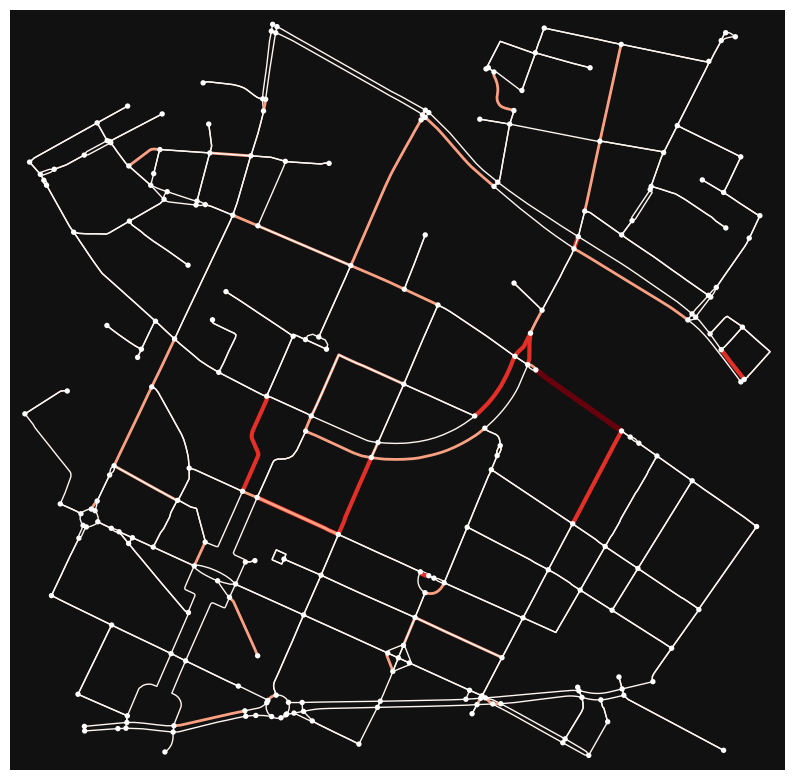

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [41]:
import osmnx as ox
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

def edge_car_counts(G, cars):
    counts = {(u, v, 0): 0 for u, v, _ in G.edges(keys=True)}
    for car in cars:
        if car.path:
            next_node = car.path[0]
            counts[(car.current_location, next_node, 0)] += 1
    return counts

def plot_network_with_traffic(G, cars):
    edge_colors = []
    edge_widths = []

    counts = edge_car_counts(G, cars)
    max_count = max(counts.values())

    for u, v, _ in G.edges(keys=True):
        count = counts.get((u, v, 0), 0)
        edge_colors.append(plt.cm.Reds(count / max_count))
        edge_widths.append(1 + count)

    fig, ax = ox.plot_graph(G, figsize=(10,10), edge_color=edge_colors, edge_linewidth=edge_widths)
    return fig, ax

G = ox.graph_from_address('Adalbertstraße 58, Berlin, Germany', dist=1000, network_type='drive')

cars = simulate_traffic(G)
plot_network_with_traffic(G, cars)

Step 1:
Node 21487231: 1 cars
Node 21487232: 1 cars
Node 26960758: 2 cars
Node 27555215: 1 cars
Node 27555221: 1 cars
Node 27555225: 1 cars
Node 27555226: 1 cars
Node 28373648: 2 cars
Node 28373656: 2 cars
Node 29215047: 1 cars
Node 29215057: 1 cars
Node 29216572: 1 cars
Node 29217276: 2 cars
Node 29217280: 1 cars
Node 29217293: 2 cars
Node 29217303: 1 cars
Node 29217327: 1 cars
Node 29217342: 1 cars
Node 29218294: 1 cars
Node 29218302: 1 cars
Node 29218313: 1 cars
Node 29218316: 1 cars
Node 29218318: 1 cars
Node 29218324: 1 cars
Node 29218327: 1 cars
Node 29219438: 1 cars
Node 29273048: 1 cars
Node 29273056: 1 cars
Node 29273057: 1 cars
Node 29273058: 1 cars
Node 29273064: 1 cars
Node 29273067: 1 cars
Node 29273077: 1 cars
Node 29275853: 1 cars
Node 29276209: 1 cars
Node 29276222: 1 cars
Node 29276730: 1 cars
Node 29276737: 1 cars
Node 29276743: 2 cars
Node 29276746: 1 cars
Node 29276752: 2 cars
Node 29276757: 1 cars
Node 29276764: 1 cars
Node 29276773: 1 cars
Node 29276778: 1 cars
No

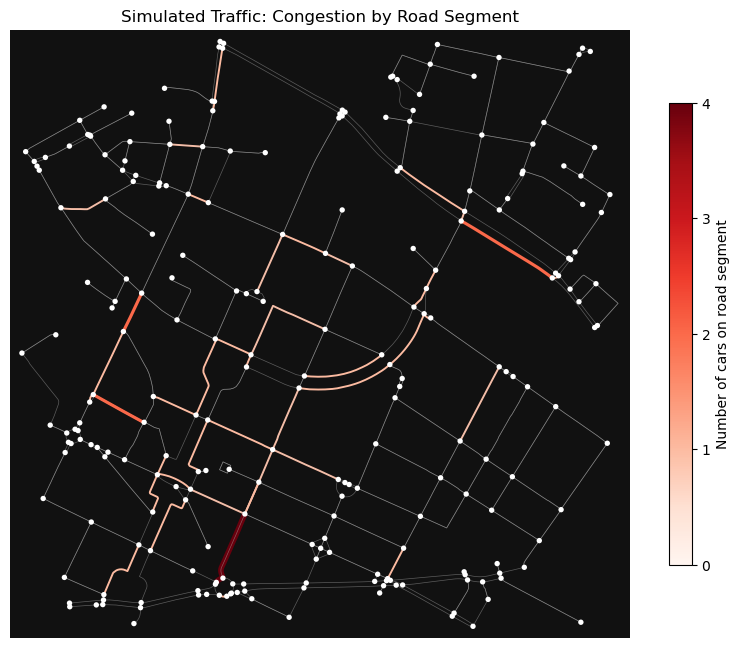

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def edge_car_counts(G, cars):
    # Count cars by (u, v, key) of next edge they are about to take
    counts = {(u, v, k): 0 for u, v, k in G.edges(keys=True)}
    for car in cars:
        if car.path:
            next_node = car.path[0]
            # assume simple graphs where key=0; if multi-edges exist, pick key=0
            key = 0
            if (car.current_location, next_node, key) in counts:
                counts[(car.current_location, next_node, key)] += 1
    return counts


import matplotlib as mpl

def plot_network_with_traffic(G, cars):
    counts = edge_car_counts(G, cars)
    max_count = max(counts.values()) if counts else 0

    edge_colors = []
    edge_widths = []

    cmap = plt.cm.Reds
    min_width, max_width = 0.5, 4.0

    for u, v, k in G.edges(keys=True):
        count = counts.get((u, v, k), 0)

        if max_count > 0:
            norm_val = count / max_count
        else:
            norm_val = 0.0

        if count == 0:
            color = (0.8, 0.8, 0.8, 0.4)
        else:
            color = cmap(norm_val)

        edge_colors.append(color)
        width = min_width + (max_width - min_width) * norm_val
        edge_widths.append(width)

    fig, ax = ox.plot_graph(
        G,
        figsize=(10, 10),
        edge_color=edge_colors,
        edge_linewidth=edge_widths,
        show=False,
        close=False,
    )

    if max_count > 0:
        norm = mpl.colors.Normalize(vmin=0, vmax=max_count)
        sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = fig.colorbar(sm, ax=ax, shrink=0.6)

        # enforce integer ticks 0, 1, 2, ..., max_count because we only have integer cars
        cbar.set_ticks(range(0, max_count + 1))
        cbar.set_ticklabels([str(i) for i in range(0, max_count + 1)])
        cbar.set_label("Number of cars on road segment")

    ax.set_title("Simulated Traffic: Congestion by Road Segment")
    return fig, ax

cars = simulate_traffic(G)
fig, ax = plot_network_with_traffic(G, cars)
plt.show()